# CIFAR-10 IMAGES CLASSIFICATION USING CNNs(TENSORFLOW)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

## LOAD DATA

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


### DATA VISUALIZATION

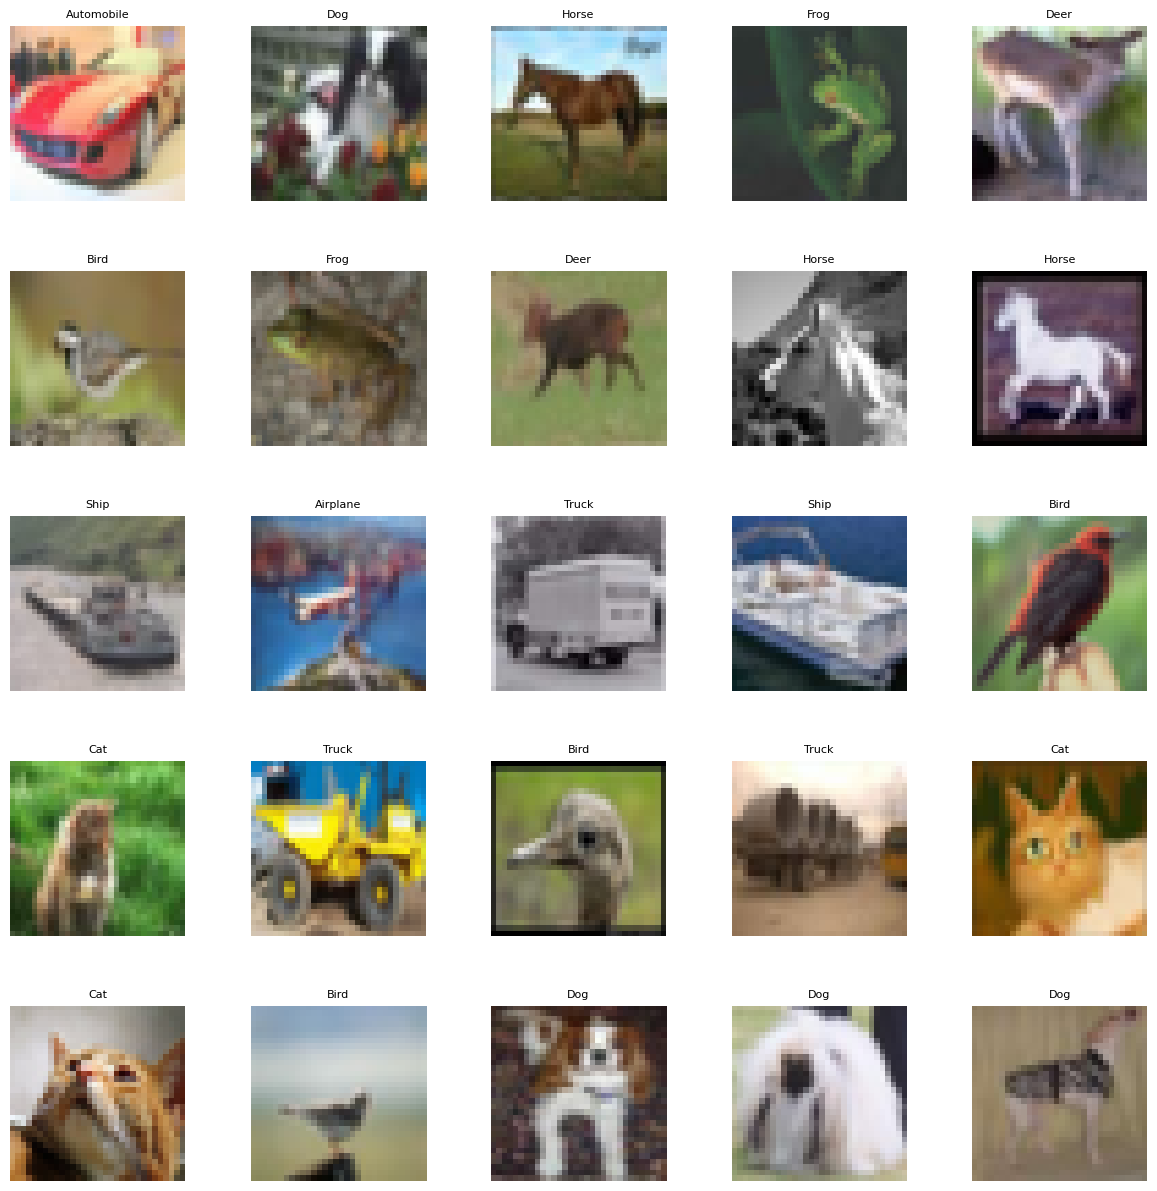

In [ ]:
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

grid = 5

fig, axs = plt.subplots(grid, grid, figsize=(15, 15)) # Tạo lưới 5 x 5

for i in range(grid):
    for j in range(grid):
        index = np.random.randint(0, len(X_train)) # Chọn ảnh tại vị trí ngẫu nhiên
        axs[i, j].imshow(X_train[index])
        axs[i, j].set_title(labels[y_train[index][0]], fontsize = 8) # Label của ảnh
        axs[i, j].axis("off") # Không có thanh chia
plt.subplots_adjust(hspace=0.4) # Độ giản cách

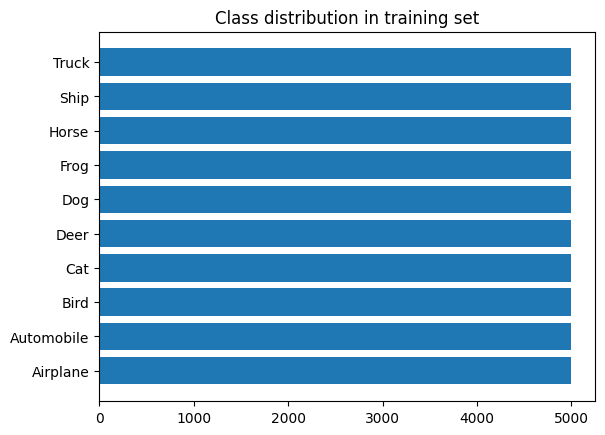

In [ ]:
classes_name = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

classes, counts = np.unique(y_train, return_counts = True)
plt.barh(classes_name, counts)
plt.title("Class distribution in training set");

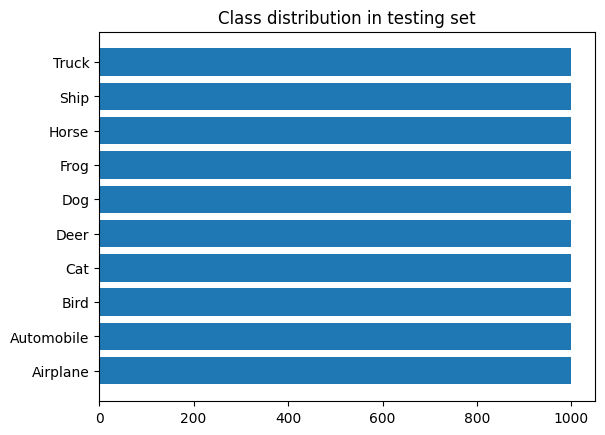

In [ ]:
classes, counts = np.unique(y_test, return_counts = True)
plt.barh(classes_name, counts)
plt.title("Class distribution in testing set");

### DATA PROPROCESSING

In [ ]:
# Scale the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Transform target into one-hot-encoding
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

In [ ]:
y_cat_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

### BUILDING MODEL

In [ ]:
INPUT_SHAPE = (32, 32, 3)
KERNEL_SIZE = (3, 3)
model = Sequential()

'''
Tổng quan mạng:
Input -> Conv2D -> BackNormalization -> Conv2D -> BackNormalization -> MaxPooling2D -> Dropout -> Conv2D -> BackNormalization -> Conv2D -> BackNormalization -> MaxPooling2D -> Dropout
-> Conv2D -> BackNormalization -> Conv2D -> BackNormalization -> MaxPooling2D -> Dropout -> Flatten -> Dense -> Dropout -> Dense -> Output
'''

# Convolutional Layer
model.add(Conv2D(filters = 32, kernel_size = KERNEL_SIZE, input_shape = INPUT_SHAPE, activation = "relu", padding = 'same')) # padding = same để input = ouput
model.add(BatchNormalization()) # Chuẩn hóa dữ liệu
model.add(Conv2D(filters = 32, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
# Pooling layer
model.add(MaxPooling2D(pool_size=(2, 2))) # downsample feature
# Dropout layers
model.add(Dropout(0.25)) # Tắt đi một số giá trị trong đầu ra của maxpooling

model.add(Conv2D(filters=64, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 128, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Confusion matrix
METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=METRICS)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 847,530 (3.23 MB)

 Trainable params: 846,634 (3.23 MB)

 Non-trainable params: 896 (3.50 KB)

### Early Stopping

In [ ]:
early_stop = EarlyStopping(monitor = "val_loss", patience = 2) # Theo dõi chỉ số val_loss, nếu nó không giảm sau 2 epochs liên tiếp thì ngừng huấn luyện.

### DATA AUGUMENTATIONS

In [ ]:
batch_size = 32
'''
ImageDataGenerator: giúp dữ liệu trở nên phong phú hơn.
  + width_shift_range: dịch chuyển ngẫu nhiên theo chiều ngang
  + height_shift_range: dịch chuyển ngẫu nhiên theo chiều dọc
  + horizontal_flip: lật ảnh theo chiều ngang
'''
data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(X_train, y_cat_train, batch_size) # cung cấp dữ liệu train theo từng batch(dữ liệu sau khi tăng cường)
steps_per_epoch = X_train.shape[0] // batch_size

r = model.fit(train_generator,
              epochs=30,
              steps_per_epoch=steps_per_epoch,
              validation_data=(X_test, y_cat_test),
              #callbacks=[early_stop],
             )

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 68s 36ms/step - accuracy: 0.2620 - loss: 2.0722 - precision: 0.4249 - recall: 0.0663 - val_accuracy: 0.4997 - val_loss: 1.3958 - val_precision: 0.7174 - val_recall: 0.2686
Epoch 2/30
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.4062 - loss: 1.6608 - precision: 0.5833 - recall: 0.2188

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 514us/step - accuracy: 0.4062 - loss: 1.6608 - precision: 0.5833 - recall: 0.2188 - val_accuracy: 0.4987 - val_loss: 1.3959 - val_precision: 0.7221 - val_recall: 0.2676
Epoch 3/30
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 58s 26ms/step - accuracy: 0.4767 - loss: 1.4571 - precision: 0.6769 - recall: 0.2677 - val_accuracy: 0.5355 - val_loss: 1.3418 - val_precision: 0.6657 - val_recall: 0.4111
Epoch 4/30
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 687us/step - accuracy: 0.3750 - loss: 1.5135 - precision: 0.7000 - recall: 0.2188 - val_accuracy: 0.5390 - val_loss: 1.3124 - val_precision: 0.6791 - val_recall: 0.4114
Epoch 5/30
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 81s 27ms/step - accuracy: 0.5872 - loss: 1.1974 - precision: 0.7551 - recall: 0.4132 - val_accuracy: 0.6646 - val_loss: 0.9746 - val_precision: 0.8062 - val_recall: 0.5199
Epoch 6/30
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 827us/step - accuracy: 0.7188 - loss: 0.8113 - precision: 0.8421 - recall: 0.5000 - val_accuracy: 0.6631 - val

### MODEL EVALUTION

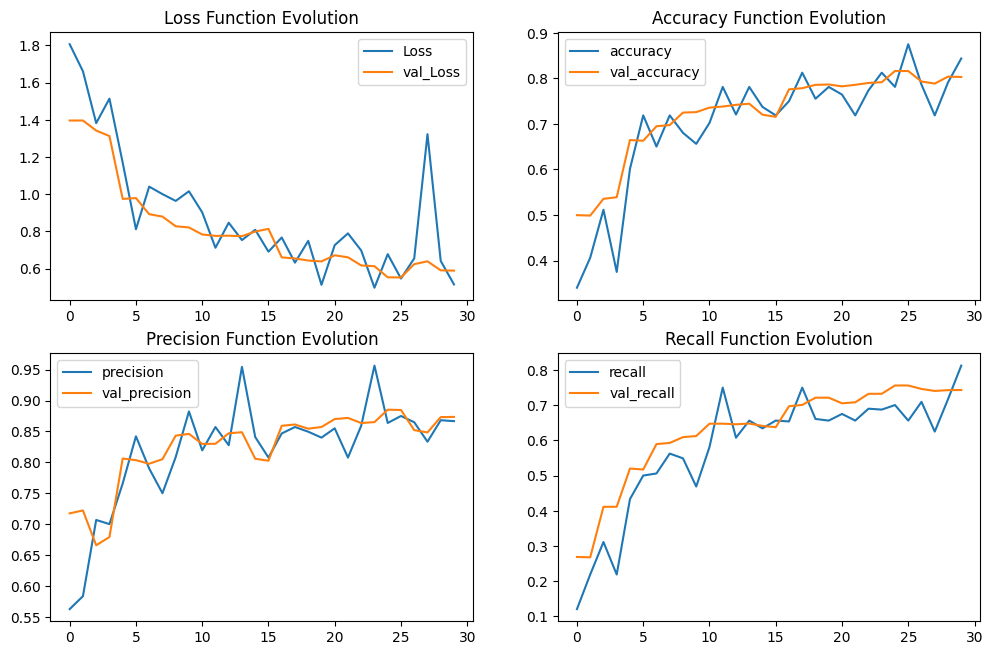

In [ ]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(r.history['precision'], label='precision')
plt.plot(r.history['val_precision'], label='val_precision')
plt.title('Precision Function Evolution')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(r.history['recall'], label='recall')
plt.plot(r.history['val_recall'], label='val_recall')
plt.title('Recall Function Evolution')
plt.legend();

### EVALUTION AND CONFUSION MATRIX

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8057 - loss: 0.5875 - precision: 0.8718 - recall: 0.7407
Test Accuracy : 80.31%
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


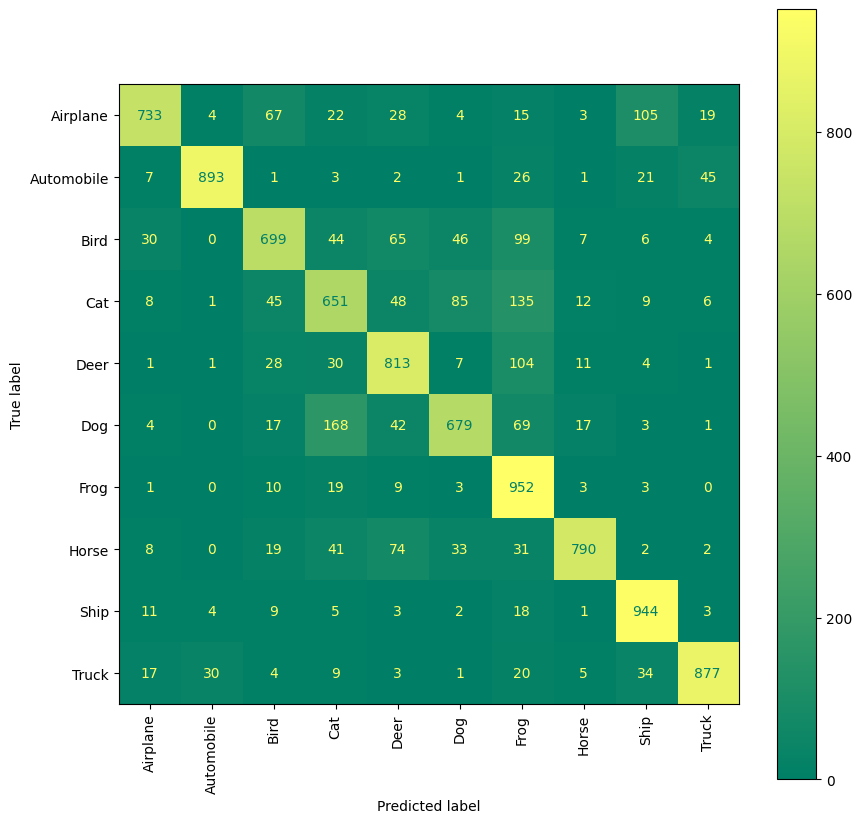

In [ ]:
evaluation = model.evaluate(X_test, y_cat_test)
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)


fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax,cmap='summer')

plt.show()

### Test on image

 Image 100 is [5]
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 997ms/step
The model predict that image 100 is 5


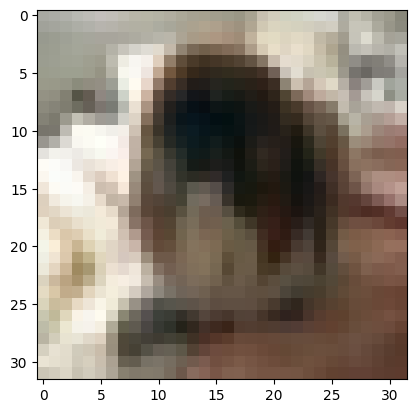

In [ ]:
my_image = X_test[100]
plt.imshow(my_image)

# that's a Deer
print(f" Image 100 is {y_test[100]}")

# correctly predicted as a Deer
pred_100 = np.argmax(model.predict(my_image.reshape(1, 32, 32, 3)))
print(f"The model predict that image 100 is {pred_100}")

In [ ]:
# Vẽ một ảnh
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"{labels[int(predicted_label)]} {100*np.max(predictions_array):2.0f}% ({labels[int(true_label)]})",
               color=color)

# Vẽ biểu đồ cột
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, int(true_label[i])
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777") # tạo sơ đồ cột cho 10 lớp
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


<ipython-input-22-fb4132b92f3a>:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.xlabel(f"{labels[int(predicted_label)]} {100*np.max(predictions_array):2.0f}% ({labels[int(true_label)]})",
<ipython-input-22-fb4132b92f3a>:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predictions_array, true_label = predictions_array, int(true_label[i])


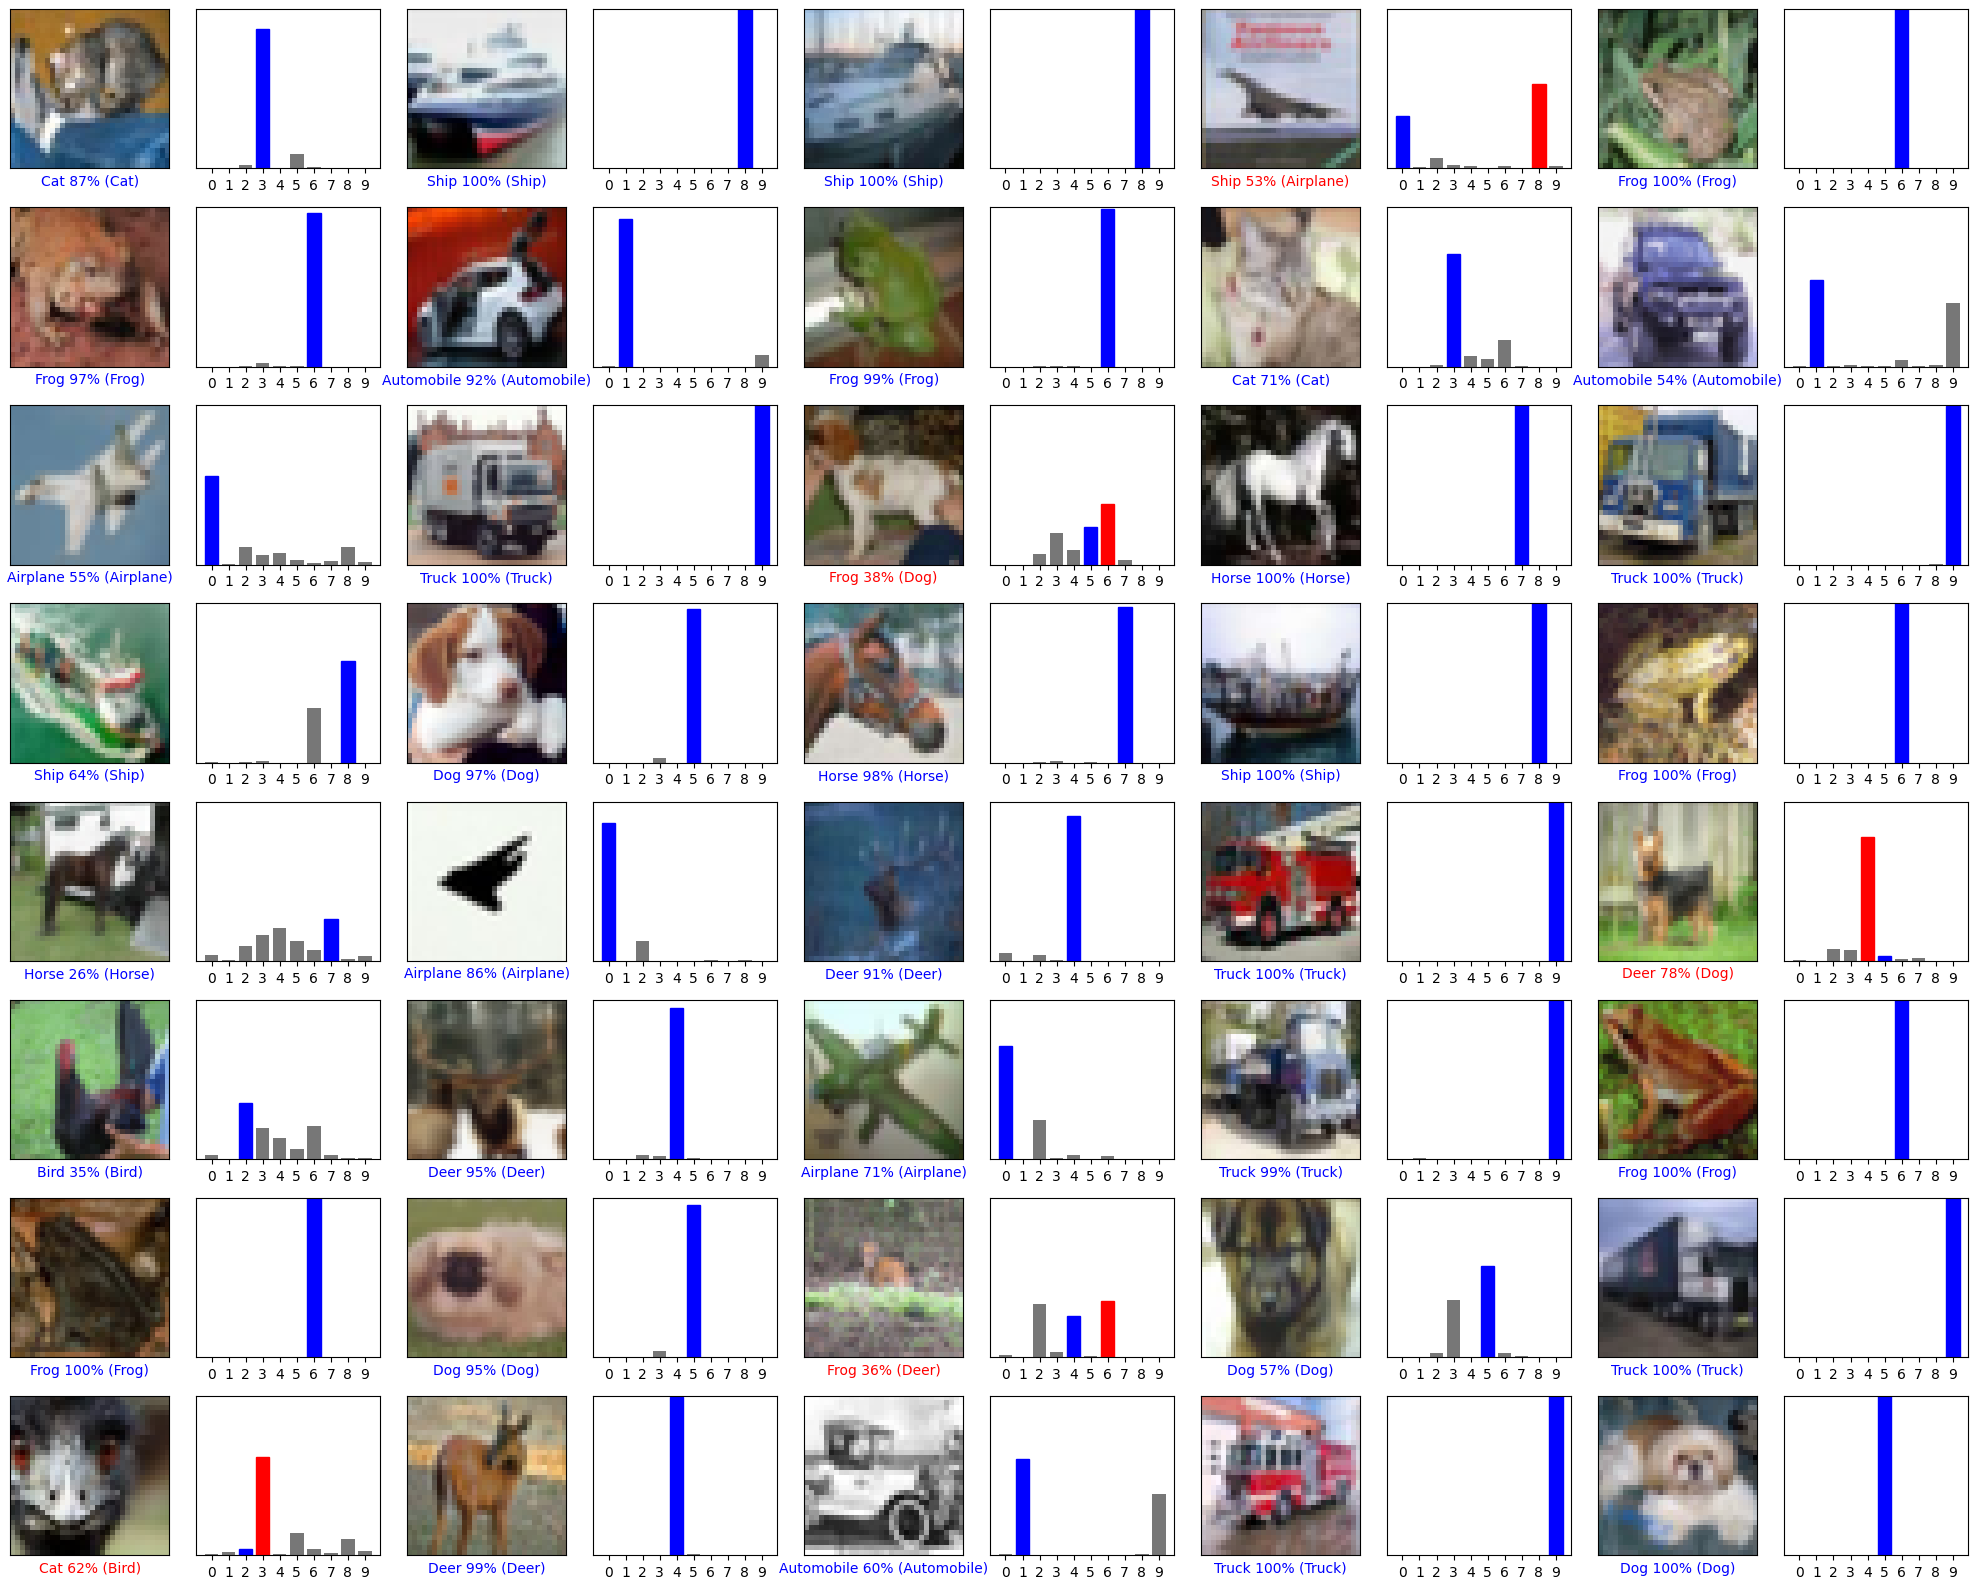

In [ ]:
predictions = model.predict(X_test)

# vẽ các ảnh với correct là blue còn incorrect là red
num_rows = 8
num_cols = 5
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions[i], y_test, X_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()